# YouTube Data API v3

### Python Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

import collections

### Imported Scripts

In [27]:
    # api_key is stored in config.py
import config

    # Functions for making youtube_requests
import youtube_requests

    # Functions for data processing
import data_processing

    # Functions for creating a network graph    
import network_graphs

import importlib
#importlib.reload(network_graphs)

In [3]:
%load_ext autoreload

In [4]:
%autoreload 1

In [28]:
%aimport network_graphs
%aimport youtube_requests
%aimport data_processing

# YouTube Channel Details by Search

Returns a details list of channels for a specific search query and number of requested results.

In [33]:
from os import path

In [43]:
path.exists('data/query_cache.json')

False

In [24]:
CHANNELS_DETAILS_ITEMS_LIST[0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet', 'contentDetails', 'statistics', 'topicDetails', 'status', 'brandingSettings', 'contentOwnerDetails'])

In [52]:
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_search('Corridor',10)

# Graph the network of channels
#G= network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, directed=True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
#fig = network_graphs.graph_nx_graph(G)
#plt.close()

[(channel['id'], channel['snippet']['title']) for channel in CHANNELS_DETAILS_ITEMS_LIST]

Already seen this query


[('UCNSeDrWRGxx5p2l3tj7RWQw', 'Corridor Cast'),
 ('UCfjQ65wKpEN4CIp5Ryhq3HA', 'Financial Corridor - Keshav Sir'),
 ('UCtpHXH-3ZbgWz8JEkanQ8kQ', 'Corridor Band'),
 ('UCsn6cjffsvyOZCZxvGoJxGg', 'Corridor'),
 ('UCSpFnDQr88xCZ80N-X7t0nQ', 'Corridor Crew'),
 ('UC4LhdXVO_dzaqFb4h4HA98g', 'Knowledge Corridor'),
 ('UC8uyVHVialBWn7Up-uKwMHg', 'Corridor'),
 ('UClswq1QEA4x6u0zQ2wjvCuA', 'Corridor - Topic'),
 ('UCI4Wh0EQPjGx2jJLjmTsFBQ', 'Node'),
 ('UCb8ewylk7d2M_1dLGEiFmuQ', 'Guillotine Channel')]

In [10]:
CORRIDOR_FIVE = ['UCNSeDrWRGxx5p2l3tj7RWQw',
                'UCsn6cjffsvyOZCZxvGoJxGg',
                'UCSpFnDQr88xCZ80N-X7t0nQ',
                'UCI4Wh0EQPjGx2jJLjmTsFBQ',
                'UCb8ewylk7d2M_1dLGEiFmuQ']

In [11]:
CORRIDOR_FIVE.sort()
''.join(CORRIDOR_FIVE)

'UCI4Wh0EQPjGx2jJLjmTsFBQUCNSeDrWRGxx5p2l3tj7RWQwUCSpFnDQr88xCZ80N-X7t0nQUCb8ewylk7d2M_1dLGEiFmuQUCsn6cjffsvyOZCZxvGoJxGg'

In [ ]:
with open('data/network_cache.json','w') as json_file:
            json.dump(CHANNEL_NETWORK_CACHE, json_file)

In [ ]:
with open('data/network_cache.json','r') as json_file:
        CHANNEL_NETWORK_CACHE = json.load(json_file)

In [ ]:
CORRIDOR_FIVE

In [ ]:
#CORRIDOR = {channel['id']:channel['snippet']['title'] for channel in CHANNELS_DETAILS_ITEMS_LIST}
CORRIDOR_FIVE = ['UCNSeDrWRGxx5p2l3tj7RWQw',
                'UCsn6cjffsvyOZCZxvGoJxGg',
                'UCSpFnDQr88xCZ80N-X7t0nQ',
                'UCI4Wh0EQPjGx2jJLjmTsFBQ',
                'UCb8ewylk7d2M_1dLGEiFmuQ']

# Youtube Channel Details by Network

-------

Have not seen this list, issuing request and caching
25 total neighbors; 0 out of 5 channels do not feature channels
97 total neighbors; 2 out of 20 channels do not feature channels
253 total neighbors; 11 out of 86 channels do not feature channels
CPU times: user 16.4 s, sys: 1.31 s, total: 17.7 s
Wall time: 30.2 s


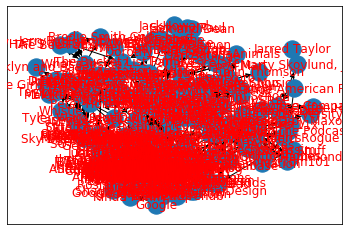

In [56]:
%%time
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network(CORRIDOR_FIVE, 3)

# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
network_graphs.graph_nx_graph(G)

In [ ]:
[channel['title'] for channel in [G.nodes[node] for node in G.nodes()] if channel['distance'] == 0]

In [ ]:
fig = network_graphs.plotly_network_graph(G,'Connections')
fig

## Page Rank, In-Degree centrality, betweeness centrality, and indegree value

In [ ]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

Sort channels by page rank

In [ ]:
features = ['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']

In [ ]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'page_rank', ascending=False).head(8)

Sort channels by betweenness centrality.

In [ ]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'betweenness_centrality', ascending=False).head(8)

Sort channels by in_degree centrality.

In [ ]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'in_degree_centrality', ascending=False).head(8)

## Strongly Connected Components

In [ ]:
scc_list = [scc for scc in nx.strongly_connected_components(G)]

In [ ]:
scc_list[42]

In [ ]:
H = G.subgraph(list(scc_list[42]))

Plot of our subgraph of strongly connected components

In [ ]:
network_graphs.graph_nx_graph(H)
network_graphs.plotly_network_graph(H)

## Instantiate a cache for both queries and networks

### Queries

### Networks

In [ ]:
with open('data/corridor_search.json','r') as json_file:
    CORRIDOR_SEARCH_10 = json.load(json_file)

In [ ]:
QUERY_CACHE = {'corridor':CORRIDOR_SEARCH_10}

with open('data/query_cache.json','w') as fout:
    json.dump(QUERY_CACHE, fout)